In [54]:
!pip install celluloid


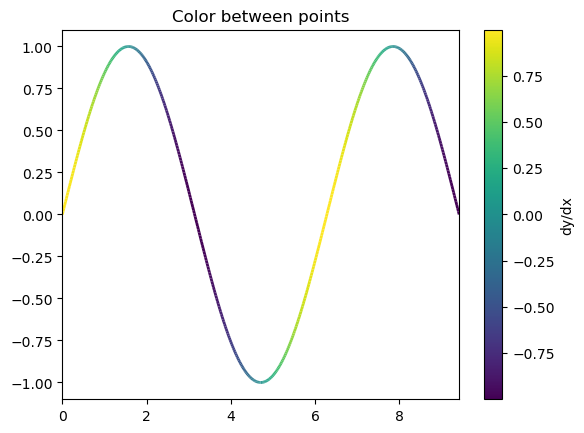

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection


def colored_line_between_pts(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified between (x, y) points by a third value.

    It does this by creating a collection of line segments between each pair of
    neighboring points. The color of each segment is determined by the
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should have a size one less than that of x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Check color array size (LineCollection still works, but values are unused)
    if len(c) != len(x) - 1:
        warnings.warn(
            "The c argument should have a length one less than the length of x and y. "
            "If it has the same length, use the colored_line function instead."
        )

    # Create a set of line segments so that we can color them individually
    # This creates the points as an N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, **lc_kwargs)

    # Set the values used for colormapping
    lc.set_array(c)

    return ax.add_collection(lc)


# -------------- Create and show plot --------------
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

fig2, ax2 = plt.subplots()


line = colored_line_between_pts(x, y, dydx, ax2, linewidth=2, cmap="viridis")
fig2.colorbar(line, ax=ax2, label="dy/dx")

ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(-1.1, 1.1)
ax2.set_title("Color between points")

plt.show()

In [8]:
#Segund intento.

In [27]:
x= np.linspace(0,3,100)
y= np.sin(x)

dydx = np.linspace(1,1,10)


C:\Users\rodal\AppData\Local\Temp\ipykernel_12068\2180240590.py:42: UserWarning: The c argument should have a length one less than the length of x and y. If it has the same length, use the colored_line function instead.
  warnings.warn(


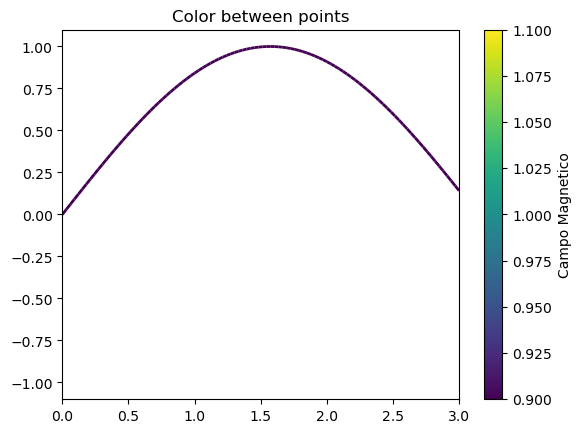

In [28]:
fig2, ax2 = plt.subplots()
fig2.colorbar(line, ax=ax2, label="Campo Magnetico")



ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(-1.1, 1.1)
ax2.set_title("Color between points")


line = colored_line_between_pts(x, y, dydx, ax2, linewidth=2, cmap="viridis")


[0.]


C:\Users\rodal\AppData\Local\Temp\ipykernel_12068\2180240590.py:42: UserWarning: The c argument should have a length one less than the length of x and y. If it has the same length, use the colored_line function instead.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

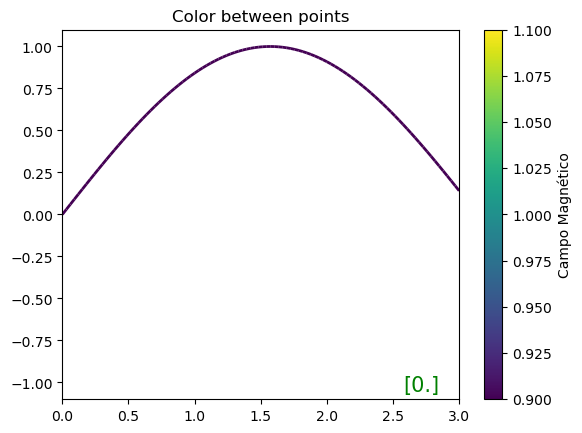

[0.1]


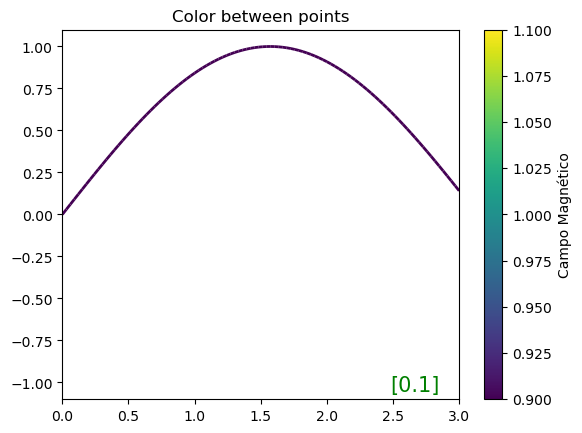

[0.2]


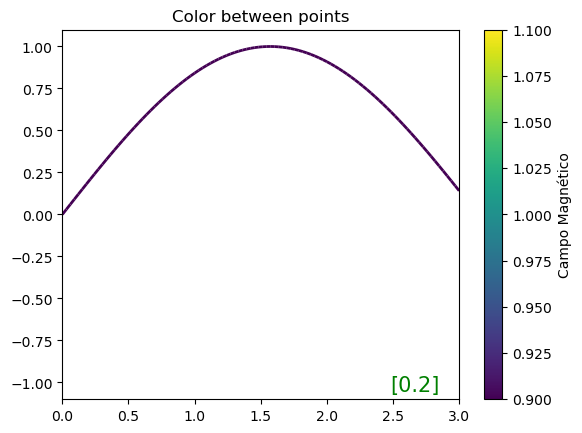

[0.3]


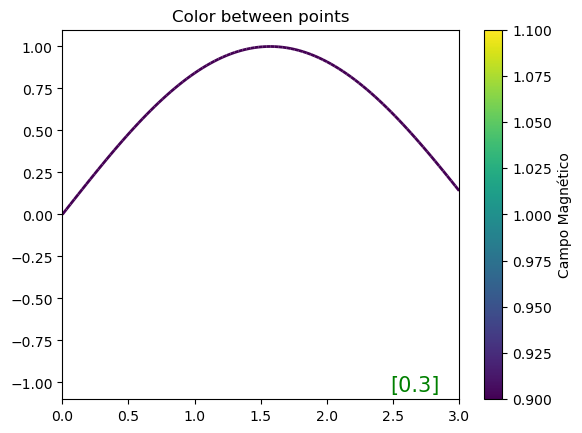

[0.4]


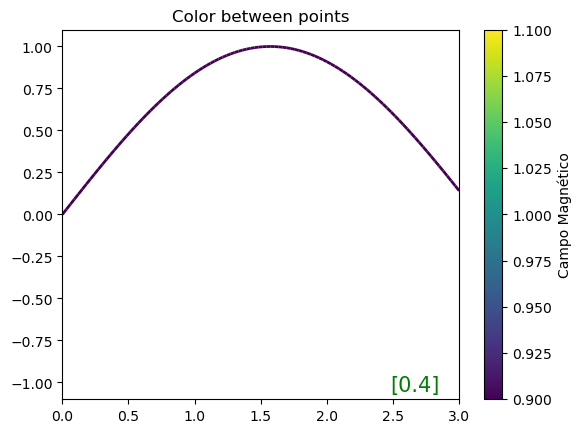

[0.5]


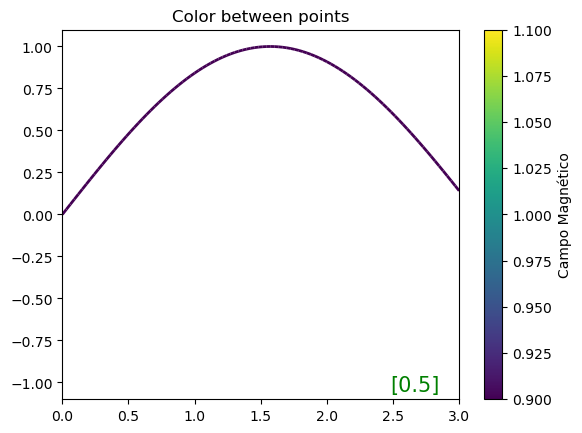

[0.6]


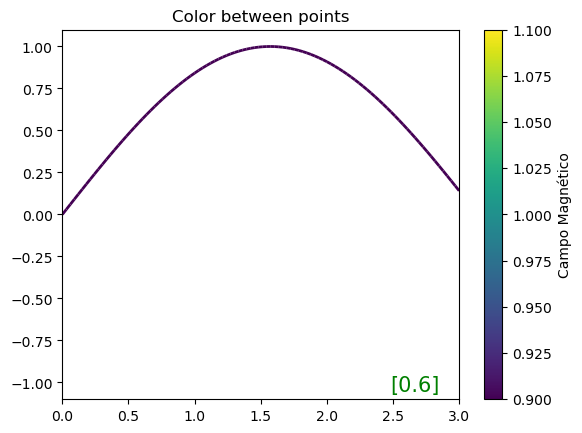

[0.7]


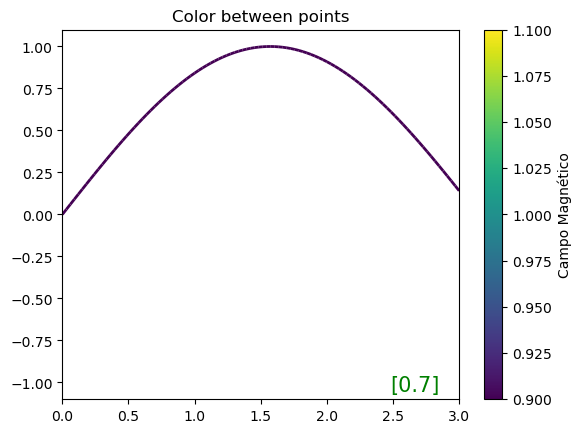

[0.8]


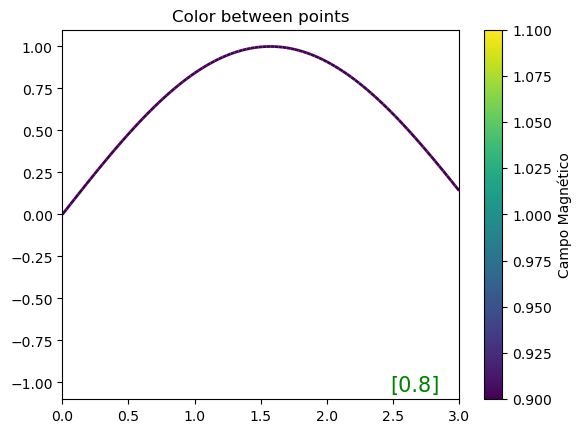

[0.9]


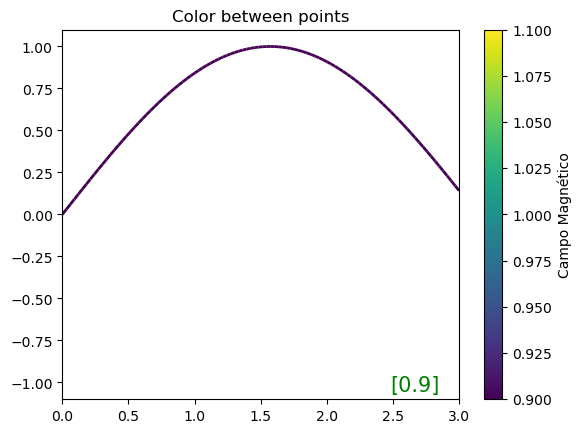

MovieWriter ffmpeg unavailable; using Pillow instead.


In [49]:
from celluloid import Camera
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots


theta = np.linspace(0, 4 * np.pi, 100)

fig = plt.figure()
camera = Camera(fig)


for i in range(10):
    x = np.linspace(0,3,100)
    y = np.sin(x)
    
    dxdy = np.linspace(i/10,1,1)
    fig2, ax2 = plt.subplots()
    #cax = plt.axes((0.0, 0.1, 0.5, 0.8, 1.0))
    #fig2.colorbar(cax=cax)
    fig2.colorbar(line, ax=ax2, label="Campo Magnético")
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_title("Color between points")
    ax2.text(0.95, 0.01, dxdy, verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes,
        color='green', fontsize=15)
    line = colored_line_between_pts(x, y, dydx, ax2, linewidth=2, cmap="viridis")
    print(dxdy)
    camera.snap()
    plt.show()

animation = camera.animate(interval=50, blit=True)
animation.save('my_animation2.gif')

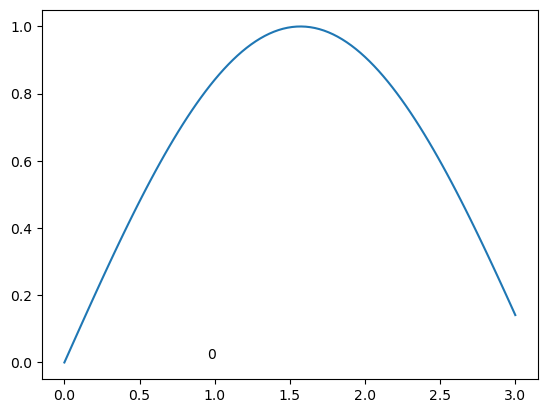

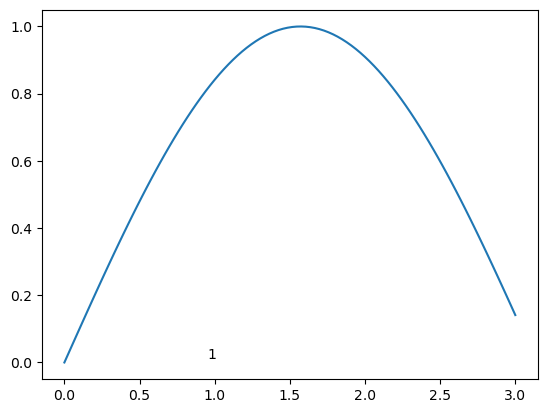

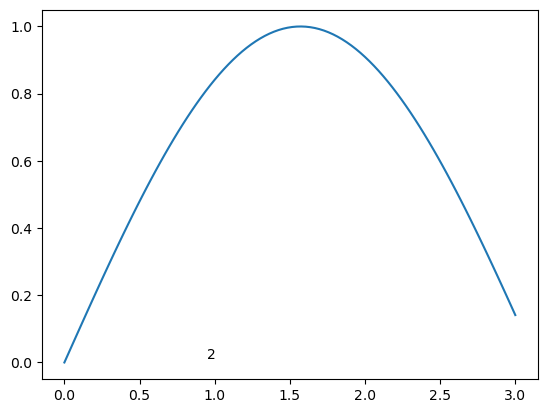

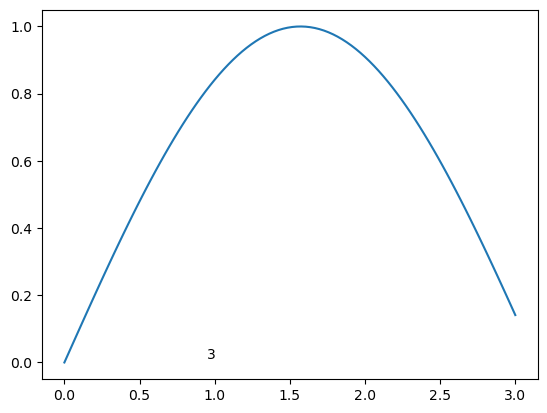

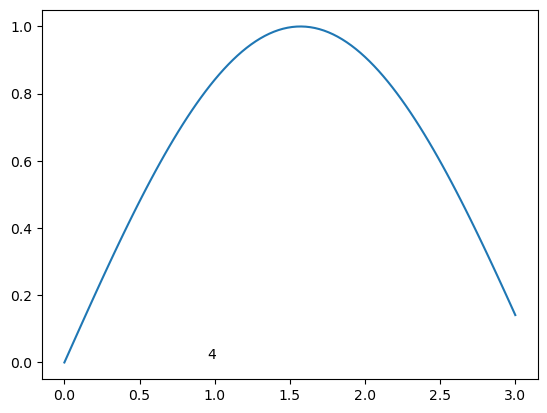

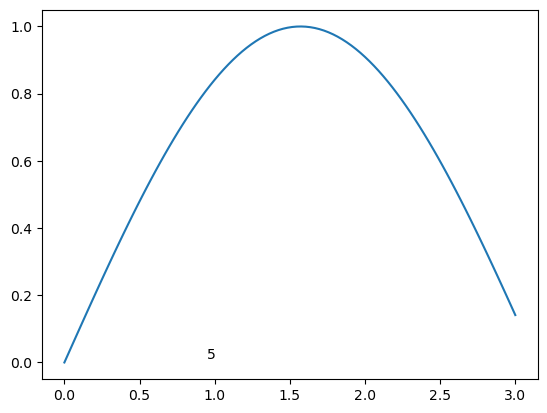

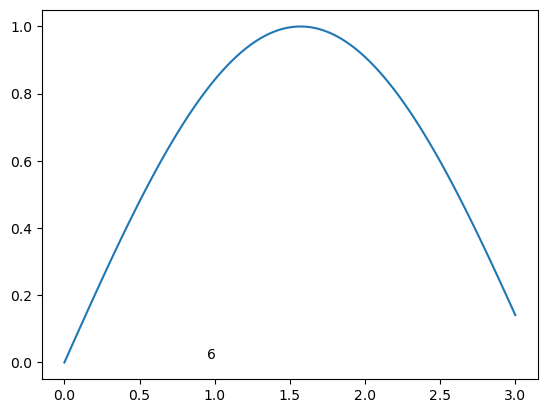

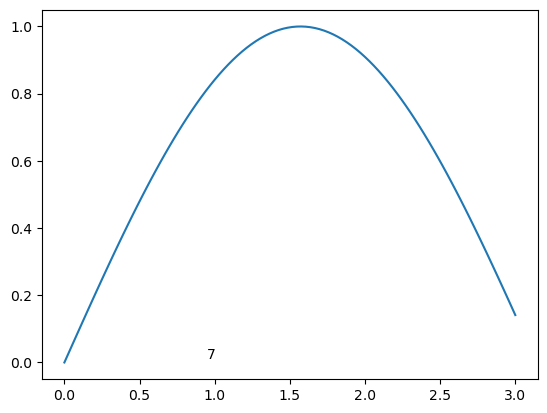

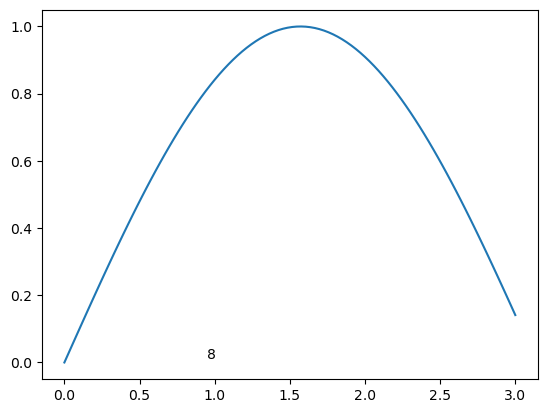

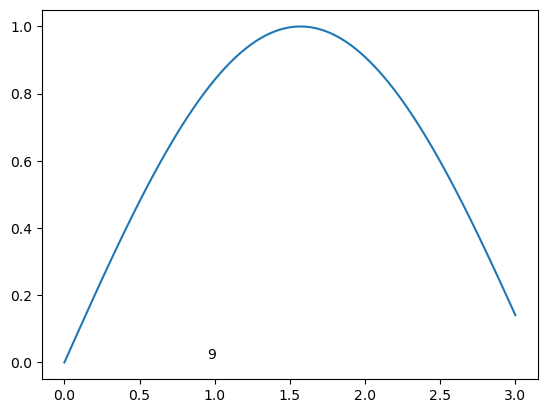

MovieWriter ffmpeg unavailable; using Pillow instead.


In [58]:
#Hacer una sencilla que funcione.
#Luego, insertamos una imagen que se mueva en el eje y, de arriba a abajo con el gif, indicando el movimiento en la otra barra.

from celluloid import Camera
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots


theta = np.linspace(0, 4 * np.pi, 100)

fig = plt.figure()
camera = Camera(fig)


for i in range(10):
    x = np.linspace(0,3,100)
    y = np.sin(x)
    plt.plot(x,y)
    plt.text(0.95,0.01, i)
    camera.snap()
    plt.show()  
    #dxdy = np.linspace(i/10,1,1)
    #fig2, ax2 = plt.subplots()
    #cax = plt.axes((0.0, 0.1, 0.5, 0.8, 1.0))
    #fig2.colorbar(cax=cax)
    #fig2.colorbar(line, ax=ax2, label="Campo Magnético")
    #ax2.set_xlim(x.min(), x.max())
    #ax2.set_ylim(-1.1, 1.1)
    #ax2.set_title("Color between points")
    #ax2.text(0.95, 0.01, dxdy, verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes, color='green', fontsize=15)
    #line = colored_line_between_pts(x, y, dydx, ax2, linewidth=2, cmap="viridis")
    #print(dxdy)
animation = camera.animate(interval=50, blit=True)
animation.save('my_animation3.gif')






In [53]:
camera

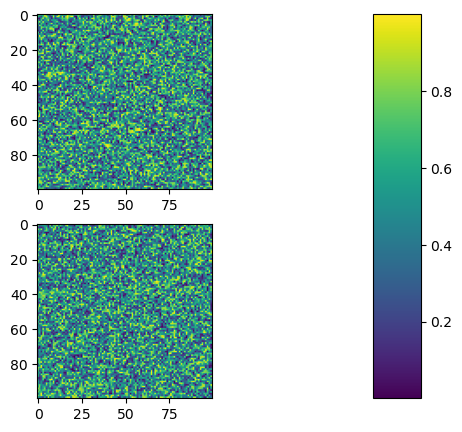

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.imshow(np.random.random((100, 100)))
plt.subplot(212)
plt.imshow(np.random.random((100, 100)))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.85, 0.1, 0.075, 0.8))
plt.colorbar(cax=cax)

plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

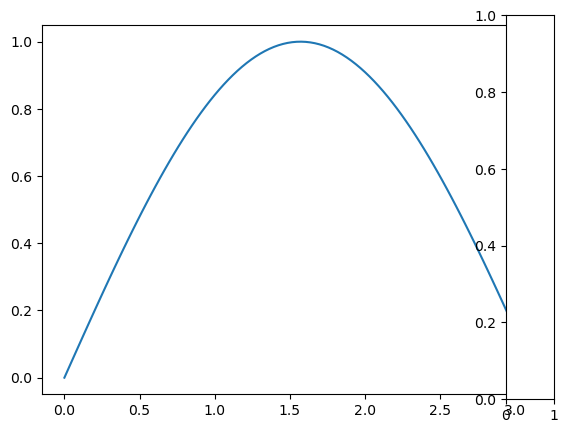

In [47]:
plt.plot(x,y)
cax = plt.axes((0.85, 0.1, 0.075, 0.8))
plt.colorbar(cax=cax)